# Project tasks

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- These tasks are intended to be open-ended, use the questions as a guide, but **you should further investigate the datasets** to answer other interesting questions about them.

---

## Task 1 - Edinburgh cycle hire data

The first task is to investigate the dataset in the file `bikes_October18.csv` which contains anonymised data for all trips taken in October 2018 with the Edinburgh Cycle Hire bikes (found [here](https://edinburghcyclehire.com/open-data/historical)). This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

- What is the average journey time and distance of bike trips which started on a Tuesday?
- How many stations appear in the dataset? Which were the most common starting stations? Think about how to display/plot the results of your analysis.
- What was the most common time(s) of day for journeys to be undertaken?
- Can you process the geographic information (latitudes and longitudes of start and end stations), and display this in an interesting way?
- Can you use the data to answer any other interesting questions about the bike trips?

Please include all the code used to generate your answer and plots, and remember to investigate beyond the initial scope of the questions.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import doctest


bike = pd.read_csv("bikes_October18.csv")
bike.sample(5)  # Have a overview of the data structure.

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
1639,2018-10-15 05:08:59.685000+00:00,2018-10-15 05:17:26.718000+00:00,507,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116
1698,2018-10-15 13:17:02.075000+00:00,2018-10-15 13:26:21.930000+00:00,559,171,George Square,"George Square, south side in front of Universi...",55.943084,-3.188311,261,Brunswick Place,Junction Brunswick Street and Elm Row,55.960930,-3.181005
3036,2018-10-25 13:35:01.255000+00:00,2018-10-25 13:43:15.400000+00:00,494,249,Fountainbridge,Fountainbridge by Gardner's Crescent,55.943357,-3.209248,171,George Square,"George Square, south side in front of Universi...",55.943084,-3.188311
3011,2018-10-25 10:11:13.995000+00:00,2018-10-25 10:45:17.118000+00:00,2043,248,Bristo Square,"Bristo Square, near Potterrow",55.946004,-3.188665,275,Riego Street,Riego Street on junction with East Fountainbridge,55.945160,-3.203678
2173,2018-10-18 20:07:38.833000+00:00,2018-10-18 20:39:09.826000+00:00,1890,265,Meadows East,Melville Terrace,55.939809,-3.182739,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116


In [2]:
## 1. What is the average journey time and distance of bike trips which
##    started on a Tuesday?

# Find the indices of all items whose start date is Tuesday.
Tuesdays = []  # The observations whose start date is Tuesday.
for i in range(len(bike["started_at"])):
    try:
        weekday = dt.datetime.strptime(bike["started_at"][i],
                                       "%Y-%m-%d %H:%M:%S.%f+00:00").strftime("%A")
    except ValueError:
        weekday = dt.datetime.strptime(bike["started_at"][i],
                                       "%Y-%m-%d %H:%M:%S+00:00").strftime("%A")
    if weekday == "Tuesday":
        Tuesdays.append(i)

In [3]:
def distance_GPS(start_latitude, start_longitude, end_latitude, end_longitude):
    """
    Calculate the distance between two points based on latitude and longitude.
    
    Keyword arguments:
    start_latitude: The latitude of starting point
    start_longitude: The longitude of starting point
    end_latitude: The latitude of ending point
    end_longitude: The longitude of ending point
    
    Returns:
    The distance between two points
    
    Tests:
    >>> print(round(distance_GPS(10, 10, 20, 20), 2))
    1544.76
    >>> print(round(distance_GPS(10, 10, 40, 40), 2))
    4458.59
    """
    R_Earth = 6371  # Radius of the earth in km
    s_lat = radians(start_latitude)
    s_lon = radians(start_longitude)
    e_lat = radians(end_latitude)
    e_lon = radians(end_longitude)
    
    lat_distance = e_lat - s_lat
    lon_distance = e_lon - s_lon
    a = ((sin(lat_distance / 2))**2
         + cos(s_lat) * cos(e_lat) * (sin(lon_distance / 2))**2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R_Earth * c
    return distance

doctest.testmod()

TestResults(failed=0, attempted=2)

In [4]:
def time_converter(x):
    """
    Convert a number representing seconds into how many hours, minutes, seconds
    this corresponds to.
    
    Keyword arguments:
    x: The number representing seconds to be converted
    
    Returns:
    A string contains the corresponding hours, minutes, seconds of the argument
    number.
    
    Tests:
    >>> print(time_converter(121.333125))
    2 minutes 1.33 seconds
    >>> print(time_converter(3681.5))
    1 hours 1 minutes 21.5 seconds
    """
    seconds = round(x % 60, 2)
    remain_seconds = x - seconds
    minutes = int((remain_seconds / 60) % 60)
    remain_minutes = remain_seconds / 60 - minutes
    hours = int(remain_minutes / 60)
    if hours == 0:
        if minutes == 0:
            return str(seconds) + "seconds"
        else:
            return str(minutes) + " minutes " + str(seconds) + " seconds"
    else:
        return (str(hours) + " hours " + str(minutes) + " minutes "
                + str(seconds) + " seconds")
    
doctest.testmod()

TestResults(failed=0, attempted=4)

In [6]:
# Calculate average journey time of bike trips which started on a Tuesday.
avg_time_Tue = round(sum(bike["duration"][Tuesdays]) / len(Tuesdays), 2)
print("The average journey time of bike trips which started on a Tuesday"
      "is roughly",
      time_converter(avg_time_Tue))

# Get the distance of every trip on a Tuesday.
distances_Tue = []  # Contains all journey distances of bike trips
                    # which started on a Tuesday
for i in Tuesdays:
    start_latitude = bike["start_station_latitude"][i]
    end_latitude = bike["end_station_latitude"][i]
    start_longitude = bike["start_station_longitude"][i]
    end_longitude = bike["end_station_longitude"][i]
    distance_Tue = distance_GPS(start_latitude, start_longitude,
                                end_latitude, end_longitude)
    distances_Tue.append(distance_Tue)
    
# Calculate average distance of bike trips which started on a Tuesday.
avg_distance_Tue = round(sum(distances_Tue) / len(Tuesdays), 2)
print("The average journey distance of bike trips which started"
      "on a Tuesday is roughly",
      avg_distance_Tue, "kilometres.")

The average journey time of bike trips which started on a Tuesdayis roughly 22 minutes 48.65 seconds
The average journey distance of bike trips which startedon a Tuesday is roughly 1.68 kilometres.


There are totally 31 stations appear in the dataset.
Bristo Square is the most common starting stations, which appears 299 times in the dataset.


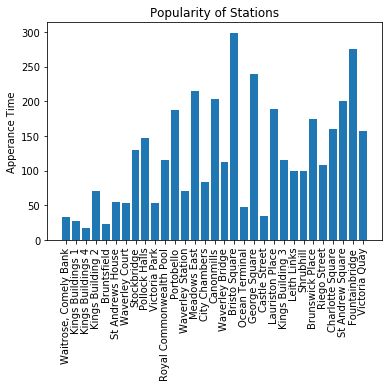

In [8]:
## 2. How many stations appear in the dataset? Which were the most common starting stations?
##    Which were the most common starting stations? Think about how to display/plot the results
##    of your analysis.

# Get the list of stations.
stations = list(set(bike["start_station_name"]))  # All unique station names

# Get their appearance times in the dataset.
stations_counts = []  # The appearing times of each station
for s in stations:
    stations_counts.append(list(bike["start_station_name"]).count(s))
most_common_station = stations[stations_counts.index(max(stations_counts))]
print("There are totally {} stations appear in the dataset."
      .format(len(stations)))
print("{} is the most common starting stations, which appears "
      "{} times in the dataset."
      .format(most_common_station, max(stations_counts)))

# Plot the bar figure of appearance times of stations,
# which shows the differences more clearly.
fig_station, ax_station = plt.subplots()
ax_station.set(ylabel='Apperance Time',
               title='Popularity of Stations')
ax_station.bar(stations, stations_counts)
# Due to the long length of station names, set the rotation degree to 90.
ax_station.set_xticklabels(stations, fontsize=10, rotation=90)

plt.show()

In [9]:
## 3. What was the most common time(s) of day for journeys to be undertaken?

# Get the list of starting and ending hours.
start_hours = []
end_hours = []
for i in range(len(bike["started_at"])):
    try:
        start_hour = dt.datetime.strptime(bike["started_at"][i],
                                          "%Y-%m-%d %H:%M:%S.%f+00:00").strftime("%H")
    except ValueError:
        start_hour = dt.datetime.strptime(bike["started_at"][i],
                                          "%Y-%m-%d %H:%M:%S+00:00").strftime("%H")
    try:
        end_hour = dt.datetime.strptime(bike["ended_at"][i],
                                        "%Y-%m-%d %H:%M:%S.%f+00:00").strftime("%H")
    except ValueError:
        end_hour = dt.datetime.strptime(bike["ended_at"][i],
                                        "%Y-%m-%d %H:%M:%S+00:00").strftime("%H")
    start_hours.append(start_hour)
    end_hours.append(end_hour)
start_hours_unique = list(set(start_hours))
end_hours_unique = list(set(end_hours))

# Get their corresponding appearance times in the dataset.
start_hours_counts = []
end_hours_counts = []
for sh in start_hours_unique:
    start_hours_counts.append(start_hours.count(sh))
for eh in end_hours_unique:
    end_hours_counts.append(end_hours.count(eh))
most_commmon_start = int(start_hours_unique
                         [start_hours_counts.index(max(start_hours_counts))])
most_commmon_end = int(end_hours_unique
                       [end_hours_counts.index(max(end_hours_counts))])

# Considering the average journey time is no more than 1 hour, the gap between
# most common start hour and the most common end hour will be less than 2.
if most_commmon_start == most_commmon_end:
    print("The most common time of day for journeys to be undertaken is "
          "{}:00-{}:00."
          .format(most_commmon_start, most_commmon_start + 1))
else:
    print("The most common times of day for journeys to be undertaken are "
          "{}:00-{}:00 and {}:00-{}:00."
          .format(most_commmon_start, most_commmon_start + 1, most_commmon_end, most_commmon_end + 1))

The most common time of day for journeys to be undertaken is 16:00-17:00.


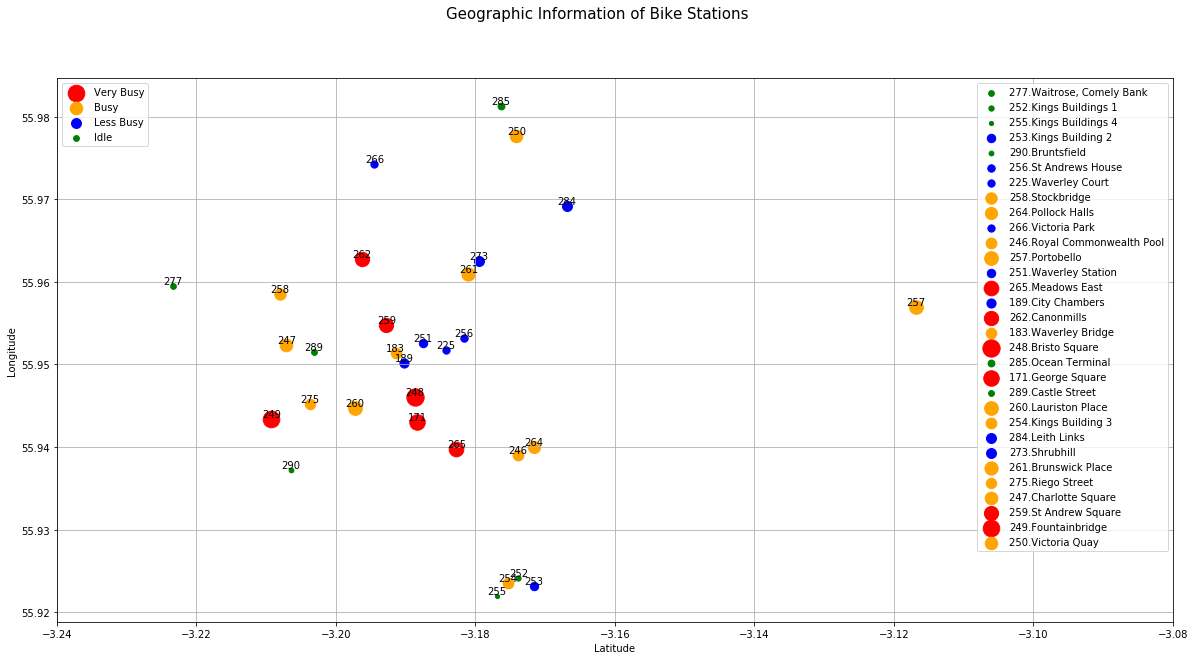

In [10]:
## 4. Can you process the geographic information
##    (latitudes and longitudes of start and end stations), 
##    and display this in an interesting way?

# Get the latitudes and longitudes of each start stations. The same result
# will be attained if we substitute the geographic information of start
# stations by those of end stations.
latitudes = []
longitudes = []
station_ids = []
for s in stations:
    for i in range(len(bike["start_station_name"])):
        if bike["start_station_name"][i] == s:
            latitudes.append(bike["start_station_latitude"][i])
            longitudes.append(bike["start_station_longitude"][i])
            station_ids.append(bike["start_station_id"][i])
            break

# Display the geographic information of each station in a scatter figure.
# Initialize the geographic information figure.
fig_geo, ax_geo = plt.subplots(figsize = (20, 10))
fig_geo.suptitle("Geographic Information of Bike Stations", fontsize = 15)
ax_geo.set(xlabel="Latitude", ylabel="Longitude")

# The stations are classified into four groups by how busy they are.
# From red to green, the station become less busier.
for i in range(len(stations)):
    if stations_counts[i] > 200:
        color_stations = "red"
        # The size(s) of a station indicates how busy the station is.
        # Busier the station is, larger the point is, and the size is
        # directly proportional to the appearance time of the station.
        legend_stations = str(station_ids[i]) + "." + stations[i]
        p1 = ax_geo.scatter(longitudes[i], latitudes[i],s = stations_counts[i],
                       c = color_stations, label = legend_stations)
    elif stations_counts[i] > 100:
        color_stations = "orange"
        legend_stations = str(station_ids[i]) + "." + stations[i]
        p2 = ax_geo.scatter(longitudes[i], latitudes[i], s = stations_counts[i],
                       c = color_stations, label = legend_stations)
    elif stations_counts[i] > 50:
        color_stations = "blue"
        legend_stations = str(station_ids[i]) + "." + stations[i]
        p3 = ax_geo.scatter(longitudes[i], latitudes[i], s = stations_counts[i],
                       c = color_stations, label = legend_stations)
    else:
        color_stations = "green"
        legend_stations = str(station_ids[i]) + "." + stations[i]
        p4 = ax_geo.scatter(longitudes[i], latitudes[i], s = stations_counts[i],
                       c = color_stations, label = legend_stations)

# Set the IDs for each station
for i, id in enumerate(station_ids):
    ax_geo.annotate(id, (longitudes[i], latitudes[i]),
                    horizontalalignment='center', verticalalignment='bottom')

# Extend the x axis to have extra space for the legend.
plt.xlim(-3.24, -3.08)

# Add an extra legend indicating the meaning of colors.
sample_points = [p1, p2, p3, p4]
color_meanings = ["Very Busy", "Busy", "Less Busy", "Idle"]
legend_color = plt.legend(sample_points, color_meanings, loc=2)
plt.legend()
plt.gca().add_artist(legend_color)
plt.grid(True)

plt.show()

In [11]:
## 5. Can you use the data to answer any other interesting questions
##    about the bike trips?

## 5.1. Calculate the average journey time and distance of bike trips
##      over all time.

# Calculate average journey time of bike trips over all time.
avg_time_all = round(sum(bike["duration"]) / len(bike["duration"]), 2)
print("The average journey time of bike trips over all time is roughly",
      time_converter(avg_time_all))

# Get every distance in all trips.
distances_all = []  # Contains all journey distances of bike trips
for i in range(len(bike["duration"])):
    start_latitude = bike["start_station_latitude"][i]
    end_latitude = bike["end_station_latitude"][i]
    start_longitude = bike["start_station_longitude"][i]
    end_longitude = bike["end_station_longitude"][i]
    distance_all = distance_GPS(start_latitude, start_longitude,
                                end_latitude, end_longitude)
    distances_all.append(distance_all)
    
# Calculate average distance of bike trips over all time.
avg_distance_all = round(sum(distances_all) / len(distances_all), 2)
print("The average journey distance of bike trips over all time is roughly",
      avg_distance_all, "kilometres.")

The average journey time of bike trips over all time is roughly 31 minutes 58.52 seconds
The average journey distance of bike trips over all time is roughly 1.66 kilometres.


In [12]:
## 5.2. Evaluate the average speed of bike trips by analyzing the time
##      and distance each journey took.

speeds_all = []
for i in range(len(bike["duration"])):
    speed_all = distances_all[i] * 1000 / bike["duration"][i]
    speeds_all.append(speed_all)
avg_speed_all = round(sum(speeds_all) / len(speeds_all), 2)
print("The average speed of bike trips over all time is roughly",
      avg_speed_all, "m/s.")

The average speed of bike trips over all time is roughly 1.69 m/s.


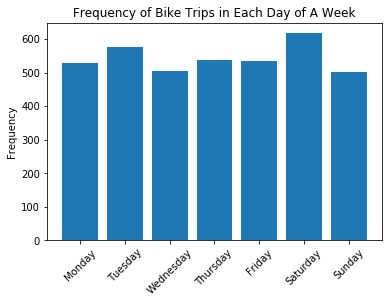

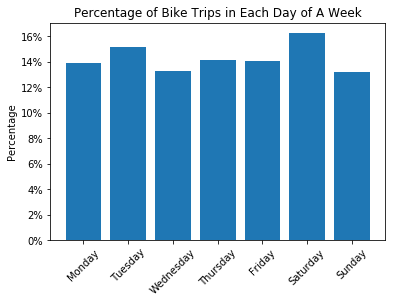

In [13]:
## 5.3. The frequency of bike trips in each day of a week.

Days_in_week = [0] * 7  # Contains the frequency of each day of a week
Weekday =["Monday", "Tuesday", "Wednesday", "Thursday",
          "Friday", "Saturday", "Sunday"]
for i in range(len(bike["started_at"])):
    try:
        weekday = dt.datetime.strptime(bike["started_at"][i],
                                       "%Y-%m-%d %H:%M:%S.%f+00:00").strftime("%A")
    except ValueError:
        weekday = dt.datetime.strptime(bike["started_at"][i],
                                       "%Y-%m-%d %H:%M:%S+00:00").strftime("%A")
    for j in range(7):
        if weekday == Weekday[j]:
            Days_in_week[j] += 1

# Plot the figure which shows the frequency of bike trips in each day of a week.
fig_fre, ax_fre = plt.subplots()
ax_fre.set(ylabel='Frequency',
           title='Frequency of Bike Trips in Each Day of A Week')
ax_fre.bar(Weekday, Days_in_week)
ax_fre.set_xticklabels(Weekday, fontsize=10, rotation=45)

# Plot the figure which shows the percentage of bike trips in each day of a week.
Days_in_week_per = [Days_in_week[i] / sum(Days_in_week) * 100 for i in range(7)]
fig_per, ax_per = plt.subplots()
ax_per.set(ylabel='Percentage',
           title='Percentage of Bike Trips in Each Day of A Week')
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax_per.yaxis.set_major_formatter(formatter)
ax_per.bar(Weekday, Days_in_week_per)
ax_per.set_xticklabels(Weekday, fontsize=10, rotation=45)

plt.show()

# Conclusion:
# People tend to travel more in Saturday.

In [15]:
## 5.4. Compare the average journey time of weekdays and weekends.

# Get all time of bike trips which started on a weekdays and weekends.
weekdays = []  # The observations whose start date is in weekdays
weekends = []  # The observations whose start date is in weekends
for i in range(len(bike["started_at"])):
    try:
        weekday = dt.datetime.strptime(bike["started_at"][i],
                                       "%Y-%m-%d %H:%M:%S.%f+00:00").strftime("%A")
    except ValueError:
        weekday = dt.datetime.strptime(bike["started_at"][i],
                                       "%Y-%m-%d %H:%M:%S+00:00").strftime("%A")
    if weekday == "Saturday" or weekday == "Sunday":
        weekends.append(i)
    else:
        weekdays.append(i)
        
# Calculate average time of bike trips which started on weekdays and weekends.
avg_time_weekdays = round(sum(bike["duration"][weekdays]) / len(weekdays), 2)
avg_time_weekends = round(sum(bike["duration"][weekends]) / len(weekends), 2)
print("The average journey time of bike trips which started in weekdays"
      "is roughly",
      time_converter(avg_time_weekdays))
print("The average journey time of bike trips which started in weekends"
      "is roughly",
      time_converter(avg_time_weekends))

# Get the conclusion by comparing the two average values.
difference_time = round(abs(avg_time_weekdays - avg_time_weekends), 2)
print("\nConclusion:")
if avg_time_weekdays > avg_time_weekends:
    print("People spend {} longer on cycling in weekdays than in weekends"
          .format(time_converter(difference_time)))
elif avg_time_weekdays < avg_time_weekends:
    print("People spend {} longer on cycling in weekends than in weekdays"
          .format(time_converter(difference_time)))
else:
    print("People spend the same time on cycling in weekends and in weekdays")
    
# Conclusion:
# People tend to spend longer time on cycling in weekends than in weekdays.

The average journey time of bike trips which started in weekdaysis roughly 27 minutes 1.88 seconds
The average journey time of bike trips which started in weekendsis roughly 43 minutes 49.86 seconds

Conclusion:
People spend 16 minutes 47.98 seconds longer on cycling in weekends than in weekdays


In [19]:
## 5.5. Compare the average journey distance of weekdays and weekends.

# Get all distances of bike trips which started on a weekdays and weekends.
distances_weekdays = []  # Contains all journey distances of bike trips
                         #  which started in weekdays
distances_weekends = []  # Contains all journey distances of bike trips
                         #  which started in weekends
for i in weekdays:
    start_latitude = bike["start_station_latitude"][i]
    end_latitude = bike["end_station_latitude"][i]
    start_longitude = bike["start_station_longitude"][i]
    end_longitude = bike["end_station_longitude"][i]
    distance_weekdays = distance_GPS(start_latitude, start_longitude,
                                     end_latitude, end_longitude)
    distances_weekdays.append(distance_weekdays)   
for i in weekends:
    start_latitude = bike["start_station_latitude"][i]
    end_latitude = bike["end_station_latitude"][i]
    start_longitude = bike["start_station_longitude"][i]
    end_longitude = bike["end_station_longitude"][i]
    distance_weekends = distance_GPS(start_latitude, start_longitude,
                                     end_latitude, end_longitude)
    distances_weekends.append(distance_weekdays)
    
# Calculate average distances of bike trips which started on a weekdays
# and weekends.
avg_distance_weekdays = round(sum(distances_weekdays) / len(weekdays), 2)
avg_distance_weekends = round(sum(distances_weekdays) / len(weekends), 2)
print("The average journey distance of bike trips which started in weekdays "
      "is roughly",
      avg_distance_weekdays, "kilometres.")
print("The average journey distance of bike trips which started in weekends "
      "is roughly",
      avg_distance_weekends, "kilometres.")

# Get the conclusion by comparing the two average values.
difference_distance = round(abs(avg_distance_weekdays - avg_distance_weekends)
                            , 2)
print("\nConclusion:")
if avg_distance_weekdays > avg_distance_weekends:
    print("People travel {} kilometres longer on cycling in weekdays than in weekends"
          .format(difference_distance))
elif avg_distance_weekdays < avg_distance_weekends:
    print("People travel {} kilometres longer on cycling in weekends than in weekdays"
          .format(difference_distance))
else:
    print("People travel the same distance on cycling in weekends and in weekdays")
    
# Conclusion: People tend to travel longer distance by bike in weekends than in weekdays.

The average journey distance of bike trips which started in weekdays is roughly 1.67 kilometres.
The average journey distance of bike trips which started in weekends is roughly 4.01 kilometres.

Conclusion:
People travel 2.34 kilometres longer on cycling in weekends than in weekdays


In [20]:
## 5.6. Compare the average journey speed of weekdays and weekends.

# Get all speeds of bike trips which started on a weekdays and weekends.
speeds_weekdays = []  # Contains all journey distances of bike trips
                      # which started in weekdays
speeds_weekends = []  # Contains all journey distances of bike trips
                      # which started in weekends
for i in range(len(weekdays)):
    speed_weekdays = distances_weekdays[i] * 1000 / bike["duration"][weekdays[i]]
    speeds_weekdays.append(speed_weekdays)
    
for i in range(len(weekends)):
    speed_weekends = distances_weekends[i] * 1000 / bike["duration"][weekends[i]]
    speeds_weekends.append(speed_weekends)

# Calculate average speed of bike trips which started on a weekdays and weekends.
avg_speed_weekdays = round(sum(speeds_weekdays) / len(speeds_weekdays), 2)
avg_speed_weekends = round(sum(speeds_weekends) / len(speeds_weekends), 2)
print("The average speed of bike trips over weekdays time is roughly",
      avg_speed_weekdays, "m/s.")
print("The average speed of bike trips over weekends time is roughly",
      avg_speed_weekends, "m/s.")

# Get the conclusion by comparing the two average values.
difference_speed = round(abs(avg_speed_weekdays - avg_speed_weekends), 2)
print("\nConclusion:")
if avg_speed_weekdays > avg_speed_weekends:
    print("People cycle {} m/s faster in weekdays than in weekends"
          .format(difference_speed))
elif avg_speed_weekdays < avg_speed_weekends:
    print("People cycle {} m/s faster in weekends than in weekdays"
          .format(difference_speed))
else:
    print("People cycle in the same speed in weekends and in weekdays")
    
# Conclusion: People tend to cycle slower in weekends than in weekdays.

The average speed of bike trips over weekdays time is roughly 1.85 m/s.
The average speed of bike trips over weekends time is roughly 1.4 m/s.

Conclusion:
People cycle 0.45 m/s faster in weekdays than in weekends


---

## Task 2 - Text data analysis

The second task concerns the text file `midsummer.txt` which contains the text of William Shakespeare's play *A Midsummer Night's Dream*. The play contains 5 acts, each with 2 scenes, and the task is to investigate them, and in particular to decide how positive or negative each scene is.

To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words respectively. These words come from the paper *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. So whilst the words are not ideal for our purpose (since they are mainly to do with product review sentiments), they still represent an interesting way to examine our scenes.

- You should read in all three of the data files. You will need to split the play in 'midsummer.txt' up so that each scene can be considered individually.
- You need to invent a metric for how positive or negative a given scene is, based on how many of the words in it are in the positive/negative word lists. For instance, is a scene containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the scene.
- Make a plot of the measure you have invented as a y-axis, with scene number as an x-axis.
- When a character starts speaking, their name appears in capitals, on its own line. Which character(s) speak most often?
- Can you use this data to answer any other questions about the data? For instance, could you compare different measures of positivity/negativity, or compare the pattern of positivity/negativity with that found in other plays? (You can find other texts on [the Project Gutenberg website](http://www.gutenberg.org/wiki/Main_Page).)

Note - this is a very simplistic way of doing this kind of text analysis, there are far more complex things that can be done, but I think even the basic approach is cool and can give quite interesting results.

Please include here all the code used to answer this question and generate any plots.

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re
import numpy as np
import doctest


# Considering Acts and Scenes are representing as roman numbers in the play,
# this function can make my output in a neat way.
def roman(i):
    """
    Transform an integer into the corresponding roman numeral.
    Considering the limited amount of Acts or Scenes in a common play,
    the function is designed to only accept integers less than 40.
    
    Keyword arguments:
    i: The integer to be transformed
    
    Returns:
    A string contains the corresponding roman numeral.
    
    Tests:
    >>> print(roman(14))
    XIV
    >>> print(roman(39))
    XXXIX
    """
    list = []
    if i >= 40:
        return None
    else:
        X = i // 10
        remain_ten = i % 10
        V = remain_ten // 5
        remain_five = remain_ten % 5
        I = remain_five // 1
        for j in range(X):
            list.append("X")
        if V == 1:
            if I == 4:
                list.append("IX")
            else:
                list.append("V")
                for j in range(I):
                    list.append("I")
        else:
            if I == 4:
                list.append("IV")
            else:
                for j in range(V):
                    list.append("V")
                for j in range(I):
                    list.append("I")
        string = "".join(list)
        return string
    
doctest.testmod()

TestResults(failed=0, attempted=6)

In [24]:
## 1.1. You should read in all three of the data files.

with open ("positive-words.txt", encoding="utf-8") as positive:
    with open("negative-words.txt",encoding="latin-1") as negative:
        negative_words = []
        positive_words = []
        negative = negative.read().splitlines()
        positive = positive.read().splitlines()
        for words in negative:
            negative_words.append(words)
        for words in positive:
            positive_words.append(words)
        negative_words = negative_words[negative.index('2-faced')
                                        :len(negative_words)]
        positive_words = positive_words[positive.index('a+')
                                        :len(positive_words)]
        
#Example: Get the first five positive/negative words
print("The first five positive words:", positive_words[:5])
print("The first five negative words:", negative_words[-5:])
print("\n")


## 1.2. You will need to split the play in 'midsummer.txt' up so that
##      each scene can be considered individually. 

with open ("midsummer.txt", encoding="utf-8") as original:
    ms = original.read().splitlines()
    for i in range(len(ms), 0, -1):
        if ms[i - 1] =="[Exit.]":
            end_ms_index = i
            break
    act_index = []  # The index where every act starts
    scene_index = []  # The index where every scene starts
    for index, line in enumerate(ms):
        if line[:4] == "ACT ":
            act_index.append(index)
        if line[:6] == "SCENE ":
            scene_index.append(index)
    mix_index = sorted(act_index + scene_index)
    # Each element contains two indices where every scene starts and ends.
    scenes_index = []
    scenes = []  # The content of each scene
    # Each element contains several starts and ends indices pair of the scenes who
    # are in the same act.
    scenes_in_acts_index = []
    scenes_in_acts = []  # The content of each scene grouped by acts
    for i in range(len(mix_index) - 1):
        if (mix_index[i + 1] - mix_index[i]) > 5:
            scenes_index.append([mix_index[i], mix_index[i + 1]])
    scenes = [ms[s[0]:s[1]] for s in scenes_index]
    # Initialise the last starting scene index as 0.
    last_s = 0
    # Sort out the scenes by their acts, store their indices and contents into two
    # three-dimensional lists respectively.
    for s in range(len(scenes_index)):
        for a in act_index[1:]:
            if scenes_index[s][1] == a:
                scenes_in_acts_index.append(scenes_index[last_s:(s + 1)])
                scenes_in_acts.append(scenes[last_s:(s + 1)])
                last_s = s + 1
        # Append the scenes and their indices of the final act as an element to two
        # lists respectively.
        if scenes_index[s][1] == a:
            final_a = s + 1
            for si in scene_index[(final_a + 1):]:
                scenes_in_acts_index.append(scenes_index[final_a:si])
                scenes_in_acts.append(scenes[final_a:si])
                final_a = si + 1
            scenes_in_acts_index[-1].append([scene_index[-1], end_ms_index])
            scenes_in_acts[-1].append(ms[scene_index[-1]:end_ms_index])
            
# Example: Get the starting line index of Act I Scene I.
print("The starting line index of Act I Scene I:", scenes_in_acts_index[0][0][0])
# Example: Get the 6th line of content of Act IV Scene II.
print("The 6th line of content of Act IV Scene II: '", scenes_in_acts[3][1][5], "'")
# Example: Get the number of scenes of each act.
for act in scenes_in_acts:
    print("Act {} contains {} scenes"
          .format(roman(scenes_in_acts.index(act) + 1), len(act)))

The first five positive words: ['a+', 'abound', 'abounds', 'abundance', 'abundant']
The first five negative words: ['zaps', 'zealot', 'zealous', 'zealously', 'zombie']


The starting line index of Act I Scene I: 334
The 6th line of content of Act IV Scene II: ' Have you sent to Bottom's house? is he come home yet? '
Act I contains 2 scenes
Act II contains 2 scenes
Act III contains 2 scenes
Act IV contains 2 scenes
Act V contains 2 scenes


In [43]:
## 2. You need to invent a metric for how positive or negative a given scene is.
##    For instance, is a scene containing one positive and one negative word:
##    overall positive, negative or neutral? - try and develop a single measure
##    based on the word occurrences that will describe the positivity/negativity
##    of the scene.

def ratio_positive_negative_degree(scene):
    """
    Calculate the ratio of the difference between the numbers of positive words and
    of negative words contained in the scene to the sum of these two numbers, which
    is regared as a degree of how positive or how negative the scene is. If the ratio
    is positive, then the scene is considered as overall positive, vice versa. 
    If it is 0, the scene is considered as neutral.
    
    Keyword arguments:
    scene: The scene to be analysed
    
    Returns:
    The ratio (in percentage) of the difference between the numbers of positive words
    and of negative words contained in the scene to the sum of these two numbers, 
    range from -100.0(means the number of negative words is not 0 and no positive words)
    to 100.0(means the number of positive words is not 0 and no negative words)
    
    Tests:
    >>> ratio_positive_negative_degree(["How now, my love! why is your cheek so pale?"])
    Amount of positive words: 1
    Amount of negative words: 1
    Amount of total words: 10
    0.0
    >>> ratio_positive_negative_degree(["bad", "Catch the tiger,--bootless speed,"])
    Amount of positive words: 0
    Amount of negative words: 1
    Amount of total words: 6
    -100.0
    >>> ratio_positive_negative_degree(["words: away! go; away!,", "only good"])
    Amount of positive words: 1
    Amount of negative words: 0
    Amount of total words: 6
    100.0
    """
    total_word = 0
    positive_part = 0
    negative_part = 0
    amount_blank_line = len(scene)
    for line in scene:
        # Plus a space in the end of a line in case that the last element contains
        # any punctuation marks.
        line = re.split("; |, |: |! |\? |--|.--| ", line + " ")
        total_word += len(line)
        for word in line:
            for p_word in positive_words:
                if p_word == word:
                    positive_part += 1
            for n_word in negative_words:
                if n_word == word:
                    negative_part += 1
    print("Amount of positive words:", positive_part)
    print("Amount of negative words:", negative_part)
    # The blank lines will be inevitavly counted in by the regression expression rule
    # but they should not be.
    print("Amount of total words:", total_word - amount_blank_line)
    # It is more robust to include the situation that the scene does not contain any
    # positive and negative words.
    if (positive_part + negative_part) == 0:
        return 0
    else:
        degree = (positive_part - negative_part) / (positive_part + negative_part)
        return round(degree * 100, 1)

doctest.testmod()

TestResults(failed=0, attempted=9)

Amount of positive words: 101
Amount of negative words: 57
Amount of total words: 2172
Act I Scene I is 27.8% positive.

Amount of positive words: 23
Amount of negative words: 24
Amount of total words: 882
Act I Scene II is -2.1% negative.

Amount of positive words: 67
Amount of negative words: 71
Amount of total words: 2395
Act II Scene I is -2.9% negative.

Amount of positive words: 50
Amount of negative words: 43
Amount of total words: 1390
Act II Scene II is 7.5% positive.

Amount of positive words: 45
Amount of negative words: 31
Amount of total words: 1787
Act III Scene I is 18.4% positive.

Amount of positive words: 132
Amount of negative words: 177
Amount of total words: 4438
Act III Scene II is -14.6% negative.

Amount of positive words: 73
Amount of negative words: 42
Amount of total words: 2033
Act IV Scene I is 27.0% positive.

Amount of positive words: 14
Amount of negative words: 6
Amount of total words: 401
Act IV Scene II is 40.0% positive.

Amount of positive words: 10

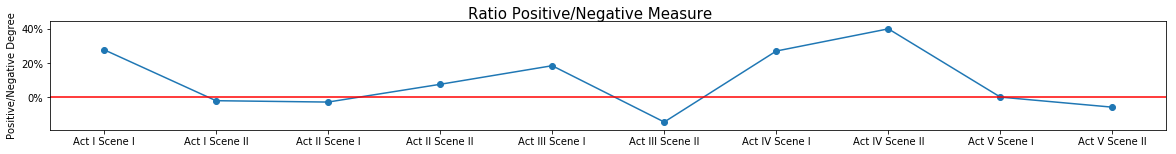

In [44]:
## 3. Make a plot of the measure you have invented as a y-axis, with scene number
##    as an x-axis.

# Using the ratio measure merit to get the positive/negative degree of each scene.
scene_names = []
ratio_positive_negative_degrees = []
for act in scenes_in_acts:
    x_a = roman(scenes_in_acts.index(act) + 1)
    for scene in act:
        x_s = roman(act.index(scene) + 1)
        y = ratio_positive_negative_degree(scene)
        if y > 0:
            print("Act {} Scene {} is {}% positive.\n".format(x_a, x_s, y))
        elif y < 0:
            print("Act {} Scene {} is {}% negative.\n".format(x_a, x_s, y))
        else:
            print("Act {} Scene {} is neutral.\n".format(x_a, x_s))
        scene_names.append("Act {} Scene {}".format(x_a, x_s))
        ratio_positive_negative_degrees.append(y)

# Plot the above result measured by ratio merit.
# Initialize the plot.
fig_ratio = plt.figure(figsize = (20, 2))
fig_ratio.suptitle("Ratio Positive/Negative Measure", fontsize = 15)
ax_ratio = fig_ratio.add_subplot(111)
# Set the parameters to make the plot more clear.
ax_ratio.set(ylabel='Positive/Negative Degree')
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax_ratio.yaxis.set_major_formatter(formatter)
ax_ratio.plot(scene_names, ratio_positive_negative_degrees)
ax_ratio.scatter(scene_names, ratio_positive_negative_degrees)
# Add a horizontal line which indicates neutral level.
ax_ratio.axhline(y = 0, color = "r", linestyle = "-")

plt.show()

# Conclusion:
# The main trend is positive-negative-positive-negative-positive-negative and the
# degree of positive is always higher than the degree of negative, which means the
# play is overall positive with some negative fluctuations. 

The character(s) speak most often is(are): LYSANDER , who spoke 50 times in the play.




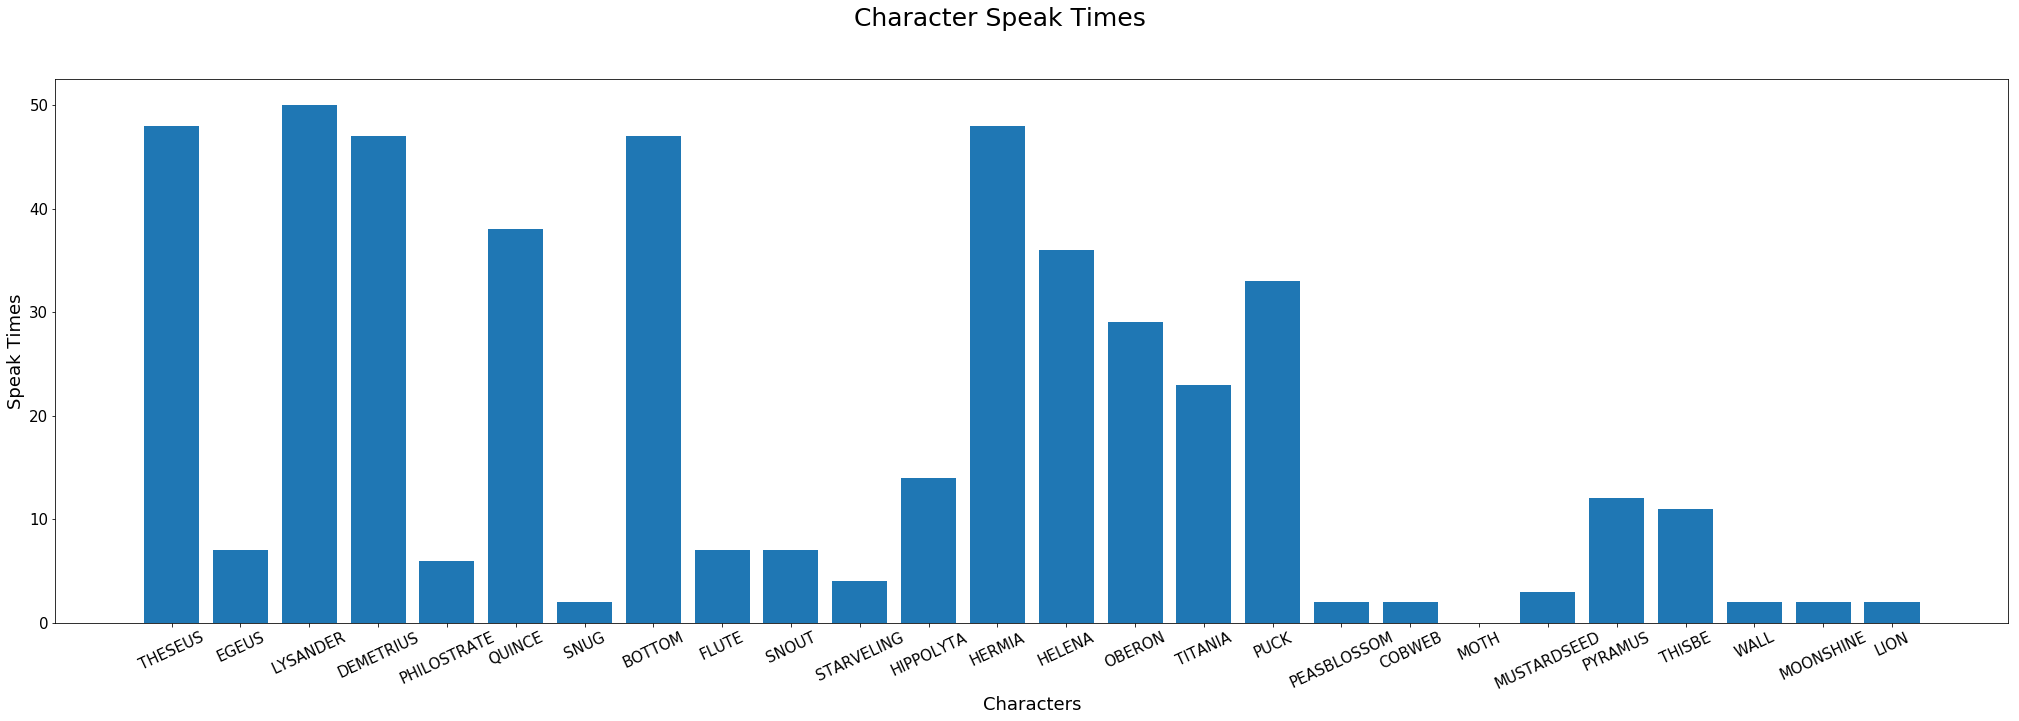

The following are all characters and their corresponding speak timesin the play:
THESEUS spoke 48 times in the play.
EGEUS spoke 7 times in the play.
LYSANDER spoke 50 times in the play.
DEMETRIUS spoke 47 times in the play.
PHILOSTRATE spoke 6 times in the play.
QUINCE spoke 38 times in the play.
SNUG spoke 2 times in the play.
BOTTOM spoke 47 times in the play.
FLUTE spoke 7 times in the play.
SNOUT spoke 7 times in the play.
STARVELING spoke 4 times in the play.
HIPPOLYTA spoke 14 times in the play.
HERMIA spoke 48 times in the play.
HELENA spoke 36 times in the play.
OBERON spoke 29 times in the play.
TITANIA spoke 23 times in the play.
PUCK spoke 33 times in the play.
PEASBLOSSOM spoke 2 times in the play.
COBWEB spoke 2 times in the play.
MOTH spoke 0 times in the play.
MUSTARDSEED spoke 3 times in the play.
PYRAMUS spoke 12 times in the play.
THISBE spoke 11 times in the play.
WALL spoke 2 times in the play.
MOONSHINE spoke 2 times in the play.
LION spoke 2 times in the play.


In [47]:
## 4. When a character starts speaking, their name appears in capitals,
##    on its own line. Which character(s) speak most often?

# Firstly, create a dictionary which contains all character and their
# corresponding status.
with open ("midsummer.txt", encoding="utf-8") as original:
    ms = original.read().splitlines()
    for line in ms:
        if line == "Persons Represented.":
            char_begin = ms.index(line) + 2
        if line == "Interlude performed by the Clowns.":
            char_end = ms.index(line)
    temp_ind = ms[char_end - 1].index(" } ")
    interlude_char_status = ms[char_end - 1][(temp_ind + 3):] + " "+ ms[char_end]
    interlude_char = ms[char_end - 1][:temp_ind]
    interlude_char = interlude_char.split(", ")
    main_char_info = list(filter(None, ms[char_begin:(char_end - 1)]))
    main_char = []
    main_char_status = []
    for info in main_char_info:
        main_char.append(info.split(", ")[0])
        main_char_status.append( ", ".join((info.split(", ")[1:])))
    char = main_char + interlude_char  # 
    # Deepcopy the main_char_status list so the list main_char_status will not be
    # changed when the list char_status is changed.
    char_status = main_char_status[:]
    for i in range(len(interlude_char)):
        char_status.append(interlude_char_status)
    char_info = dict(zip(char, char_status))
    
# Secondly, look through the elements of the created character list in each scenes
# then the speak times of each character is obtained. Find the maximum value.
speak_times = [0] * len(char)
for act in scenes_in_acts:
    for scene in act:
        for line in scene:
            for i in range(len(char)):
                if char[i] == line:
                    speak_times[i] += 1
char_speak_times = dict(zip(char, speak_times))
most_speak_chars = char[speak_times.index(max(speak_times))]
print("The character(s) speak most often is(are):", most_speak_chars,
      ", who spoke", max(speak_times), "times in the play.\n\n")

# Plot the above result about speak times of characters.
f_char = plt.figure(figsize = (35, 10))
f_char.suptitle("Character Speak Times", fontsize = 25)
a_char = f_char.add_subplot(111)
plt.xlabel("Characters", fontsize = 18)
plt.ylabel("Speak Times", fontsize = 18)
a_char.tick_params(axis = 'both', which = 'major', labelsize = 15)
a_char.set_xticklabels(char, rotation = 25, fontsize = 15)
a_char.bar(char, speak_times)

plt.show()

# Print the full list of all characters with their speak times as an appendix.
print("The following are all characters and their corresponding speak times"
      "in the play:")
for character, speak in char_speak_times.items():
    print(character, "spoke", speak, "times in the play.")

In [48]:
## 5. Can you use this data to answer any other questions about the data?
##    For instance, could you compare different measures of positivity/negativity,
##    or compare the pattern of positivity/negativity with that found in other plays?
##    (You can find other texts on the Project Gutenberg website.)


## 5.1. A different measure of positivity/negativity.

def difference_positive_negative_degree(scene):
    """
    Calculate the difference between the numbers of positive words and of negative words
    contained in the scene. If the difference is positive, then the scene is considered as
    overall positive, vice versa. If it is 0, the scene is considered as neutral.
    
    Keyword arguments:
    scene: The scene to be analysed
    
    Returns:
    The difference between the numbers of positive words and of negative words contained
    in the scene. The range is unlimited.
    
    Tests:
    >>> difference_positive_negative_degree(["Your cheek is so pale!", "It: bad?"])
    -2
    >>> difference_positive_negative_degree(['bad!'] * 1001)
    -1001
    >>> difference_positive_negative_degree(["words: away! go; away!,", "only good"])
    1
    """
    positive_part = 0
    negative_part = 0
    for line in scene:
        line = re.split("; |, |: |! |\? |--|.--| ", line + " ")
        for word in line:
            for p_word in positive_words:
                if p_word == word:
                    positive_part += 1
            for n_word in negative_words:
                if n_word == word:
                    negative_part += 1
    difference = positive_part - negative_part
    return round(difference)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=12)

Amount of positive words: 101
Amount of negative words: 57
Amount of total words: 2172
Act I Scene I is 44% positive by DIFFERENCE.
Act I Scene I is 27.8% positive by RATIO.

Amount of positive words: 23
Amount of negative words: 24
Amount of total words: 882
Act I Scene II is -1% negative by DIFFERENCE.
Act I Scene II is -2.1% negative by RATIO.

Amount of positive words: 67
Amount of negative words: 71
Amount of total words: 2395
Act II Scene I is -4% negative by DIFFERENCE.
Act II Scene I is -2.9% negative by RATIO.

Amount of positive words: 50
Amount of negative words: 43
Amount of total words: 1390
Act II Scene II is 7% positive by DIFFERENCE.
Act II Scene II is 7.5% positive by RATIO.

Amount of positive words: 45
Amount of negative words: 31
Amount of total words: 1787
Act III Scene I is 14% positive by DIFFERENCE.
Act III Scene I is 18.4% positive by RATIO.

Amount of positive words: 132
Amount of negative words: 177
Amount of total words: 4438
Act III Scene II is -45% negativ

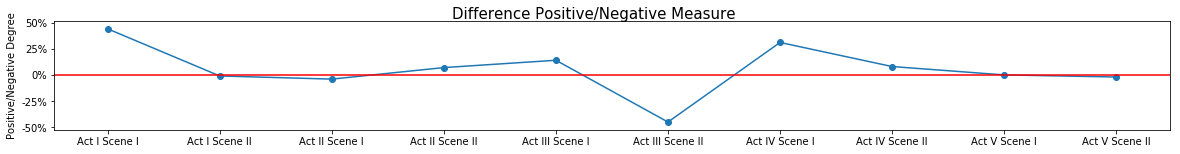

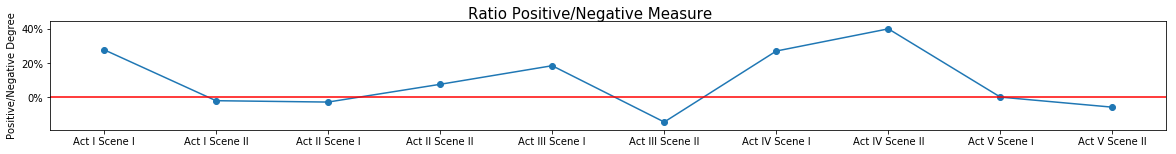

In [50]:
## 5.2. Compare different measures of positivity/negativity.

# Using the two measures to calculate the positivity/negativity degrees.
difference_scene_names = []
difference_positive_negative_degrees = []
ratio_positive_negative_degrees = []
for act in scenes_in_acts:
    x_a = roman(scenes_in_acts.index(act) + 1)
    for scene in act:
        x_s = roman(act.index(scene) + 1)
        y = difference_positive_negative_degree(scene)
        y_ratio = ratio_positive_negative_degree(scene)
        if y > 0:
            print("Act {} Scene {} is {}% positive by DIFFERENCE.".format(x_a, x_s, y))
            print("Act {} Scene {} is {}% positive by RATIO.\n".format(x_a, x_s, y_ratio))
        elif y < 0:
            print("Act {} Scene {} is {}% negative by DIFFERENCE.".format(x_a, x_s, y))
            print("Act {} Scene {} is {}% negative by RATIO.\n".format(x_a, x_s, y_ratio))
        else:
            print("Act {} Scene {} is neutral by DIFFERENCE.".format(x_a, x_s))
            print("Act {} Scene {} is neutral by RATIO.\n".format(x_a, x_s))
        difference_scene_names.append("Act {} Scene {}".format(x_a, x_s))
        difference_positive_negative_degrees.append(y)
        ratio_positive_negative_degrees.append(y_ratio)

# Set the formatter so that the positive/negative degree can be shown in percentage.
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
# Plot the above result measured by difference merit.
fig_difference = plt.figure(figsize = (20, 2))
fig_difference.suptitle("Difference Positive/Negative Measure", fontsize = 15)
ax_difference = fig_difference.add_subplot(111)
ax_difference.set(ylabel='Positive/Negative Degree')
ax_difference.yaxis.set_major_formatter(formatter)
ax_difference.plot(difference_scene_names, difference_positive_negative_degrees)
ax_difference.scatter(scene_names, difference_positive_negative_degrees)
ax_difference.axhline(y = 0, color = "r", linestyle = "-")
# Plot the previous result measured by ratio merit so that they can be compared easily.
fig_ratio = plt.figure(figsize = (20, 2))
fig_ratio.suptitle("Ratio Positive/Negative Measure", fontsize = 15)
ax_ratio = fig_ratio.add_subplot(111)
ax_ratio.set(ylabel='Positive/Negative Degree')
ax_ratio.yaxis.set_major_formatter(formatter)
ax_ratio.plot(scene_names, ratio_positive_negative_degrees)
ax_ratio.scatter(scene_names, ratio_positive_negative_degrees)
ax_ratio.axhline(y = 0, color = "r", linestyle = "-")

plt.show()

# Conclusion of new measure merit: As same as the conclusion of the ratio measure merit.
 
# *Note: Comparison of two measure merits is written in next cell as a markdown.

### Comparison of My Two Different Measures of Positivity/Negativity

Merit Based on Difference:
- Advantage:
    - More sensitive on the single scene's positive/negative degree.
    - More simple algorithm and no need to consider some special situations (e.g. when 
      there are no any positive/negative words in a scene).
- Disadvantage:
    - Less sensitive on the change of the positive/negative degree in different scenes.
    - The result is unlimited which means it is sometimes impossible to compare the 
      positive/negative degrees between different scenes in a feasible range when the
      gap of absolute word amount between different scenes is huge.

Merit Based on Ratio:
- Advantage:
    - More sensitive on the change of the positive/negative degree in different scenes.
    - The result is limited which means it is always possible to compare the positive/negative
      degrees between different scenes in a feasible range.
- Disadvantage:
    - Less sensitive on on the single scene's positive/negative degree.
    - More complicated algorithm and need to consider some special situations (e.g. when 
      there are no any positive/negative words in a scene).

In [51]:
## 5.3. Infer the main characters and minor characters by their speaking times
##      in the play.

# Assume that the characters who spoke more than 45 times are main characters.
print("<MAIN CHARATERS>".center(100))
for character, status in char_info.items():
    if char_speak_times[character] > 45:
        char_and_status = character + ":" + status
        print(char_and_status.center(100))
print("\n")

# Assume that the characters who spoke more than 20 and less than or equal to
# 45 times are supporting characters.
print("<SUPPORTING CHARATERS>".center(100))
for character, status in char_info.items():
    if char_speak_times[character] > 20 and char_speak_times[character] <= 45:
        char_and_status = character + ":" + status
        print(char_and_status.center(100))
print("\n")

# Assume that the characters who spoke less than or equal to 20 times are
# main characters.
print("<MINOR CHARATERS>".center(100))
for character, status in char_info.items():
    if char_speak_times[character] <= 20:
        char_and_status = character + ":" + status
        print(char_and_status.center(100))

        
# After the previous step, we now have a main character list. By analyzing the
# status of main characters, it is possible to have a overview of the whole play.

#         MAIN CHARATERS        
# THESEUS : Duke of Athens.
# LYSANDER : in love with Hermia.
# DEMETRIUS : in love with Hermia.
# BOTTOM : the Weaver.
# HERMIA : daughter to Egeus

# 1. Among all main characters, there are two who is in love with Hermia and Hermia
#    herself is one of the main characters. So the play probably is a love story.
# 2. One of the main characters Theseus is the duke of Athens and he is the only
#    character whose description contains a place name. So there is a high possibility
#    that the play is happening in Athens.
# 3. One of the main characters Bottom is a weaver, who is unrelated to other main
#    characters by the description. So it is likely that this weaver is a second main
#    character who leads another story line.

                                          <MAIN CHARATERS>                                          
                                      THESEUS:Duke of Athens.                                       
                                   LYSANDER:in love with Hermia.                                    
                                   DEMETRIUS:in love with Hermia.                                   
                                         BOTTOM:the Weaver.                                         
                          HERMIA:daughter to Egeus, in love with Lysander.                          


                                       <SUPPORTING CHARATERS>                                       
                                       QUINCE:the Carpenter.                                        
                                   HELENA:in love with Demetrius.                                   
                                    OBERON:King of the Fairies.                          

In Act I The character(s) speak most often is(are): QUINCE , who spoke 20 times: 



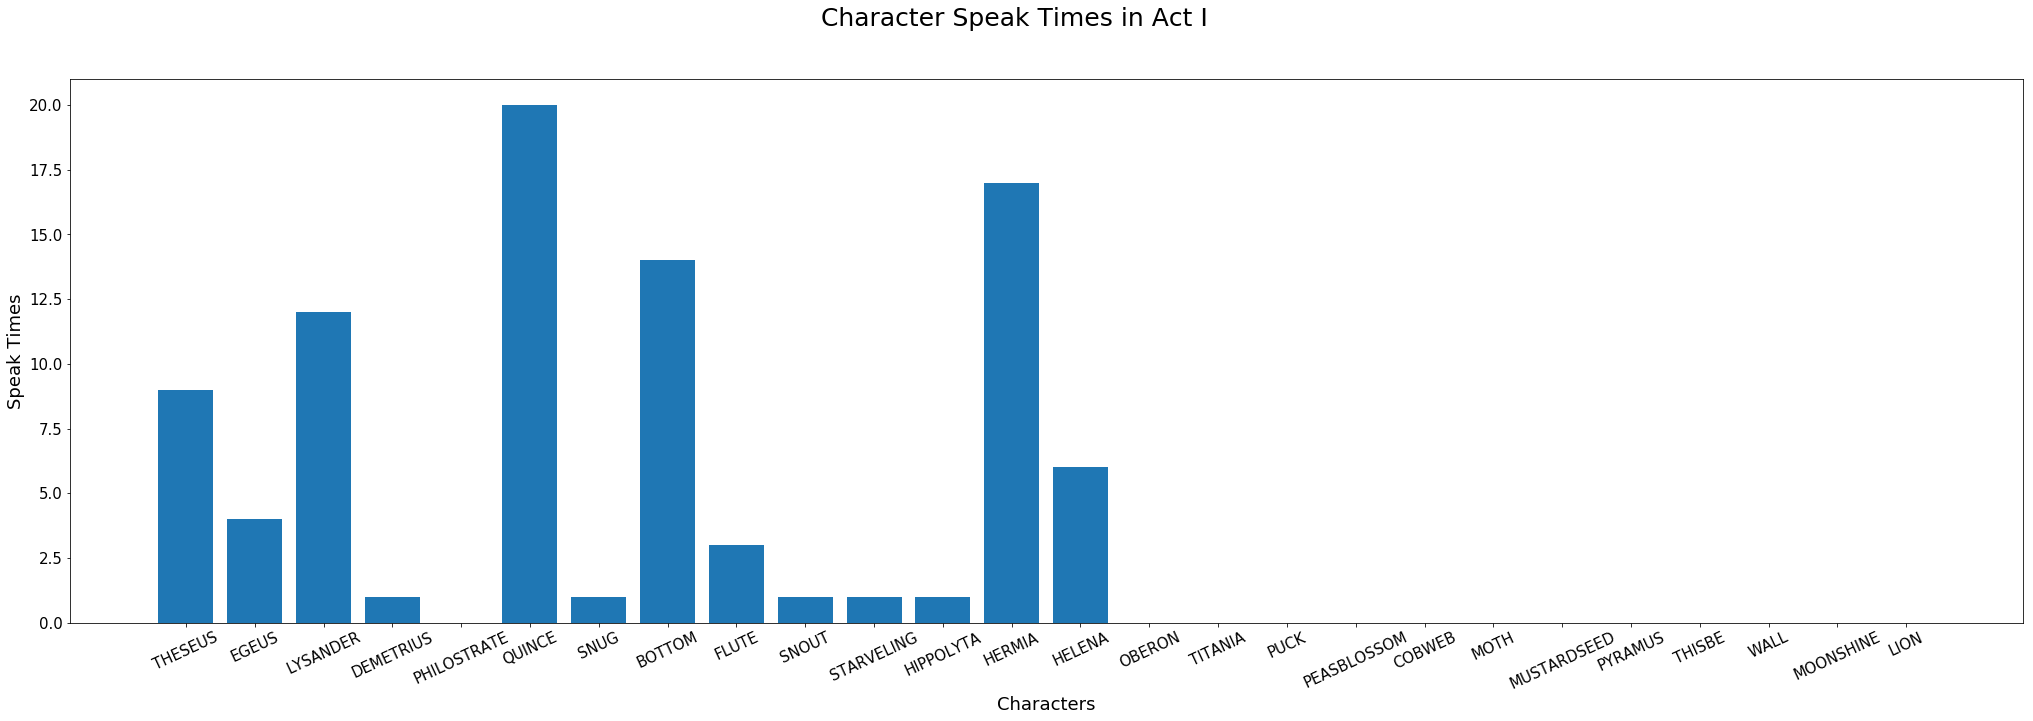

In Act II The character(s) speak most often is(are): OBERON , who spoke 12 times: 



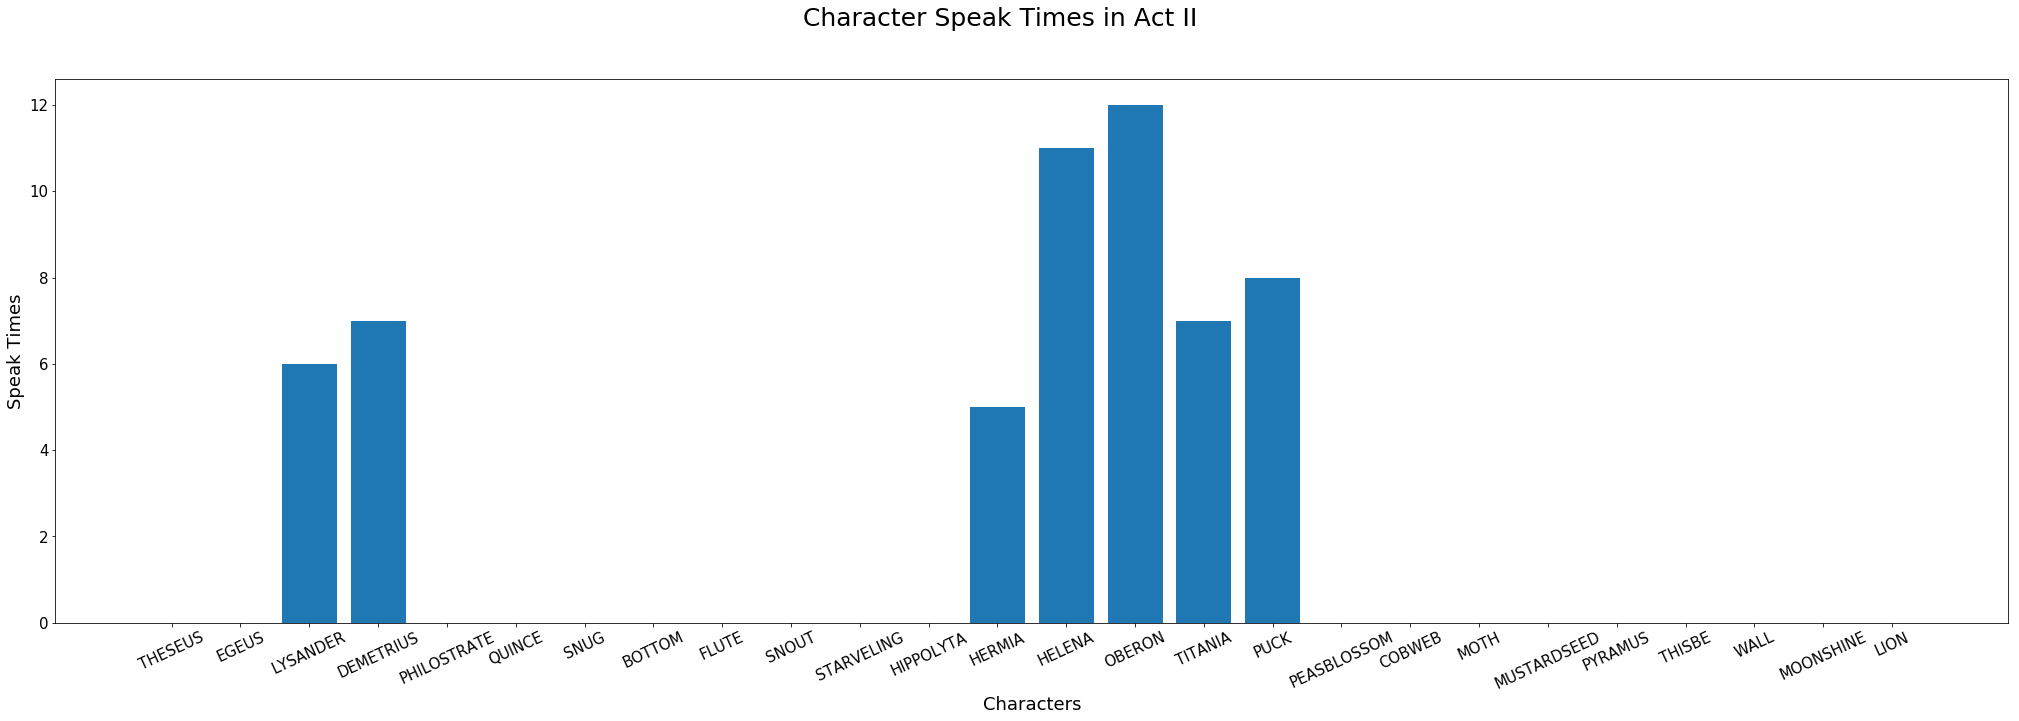

In Act III The character(s) speak most often is(are): HERMIA , who spoke 24 times: 



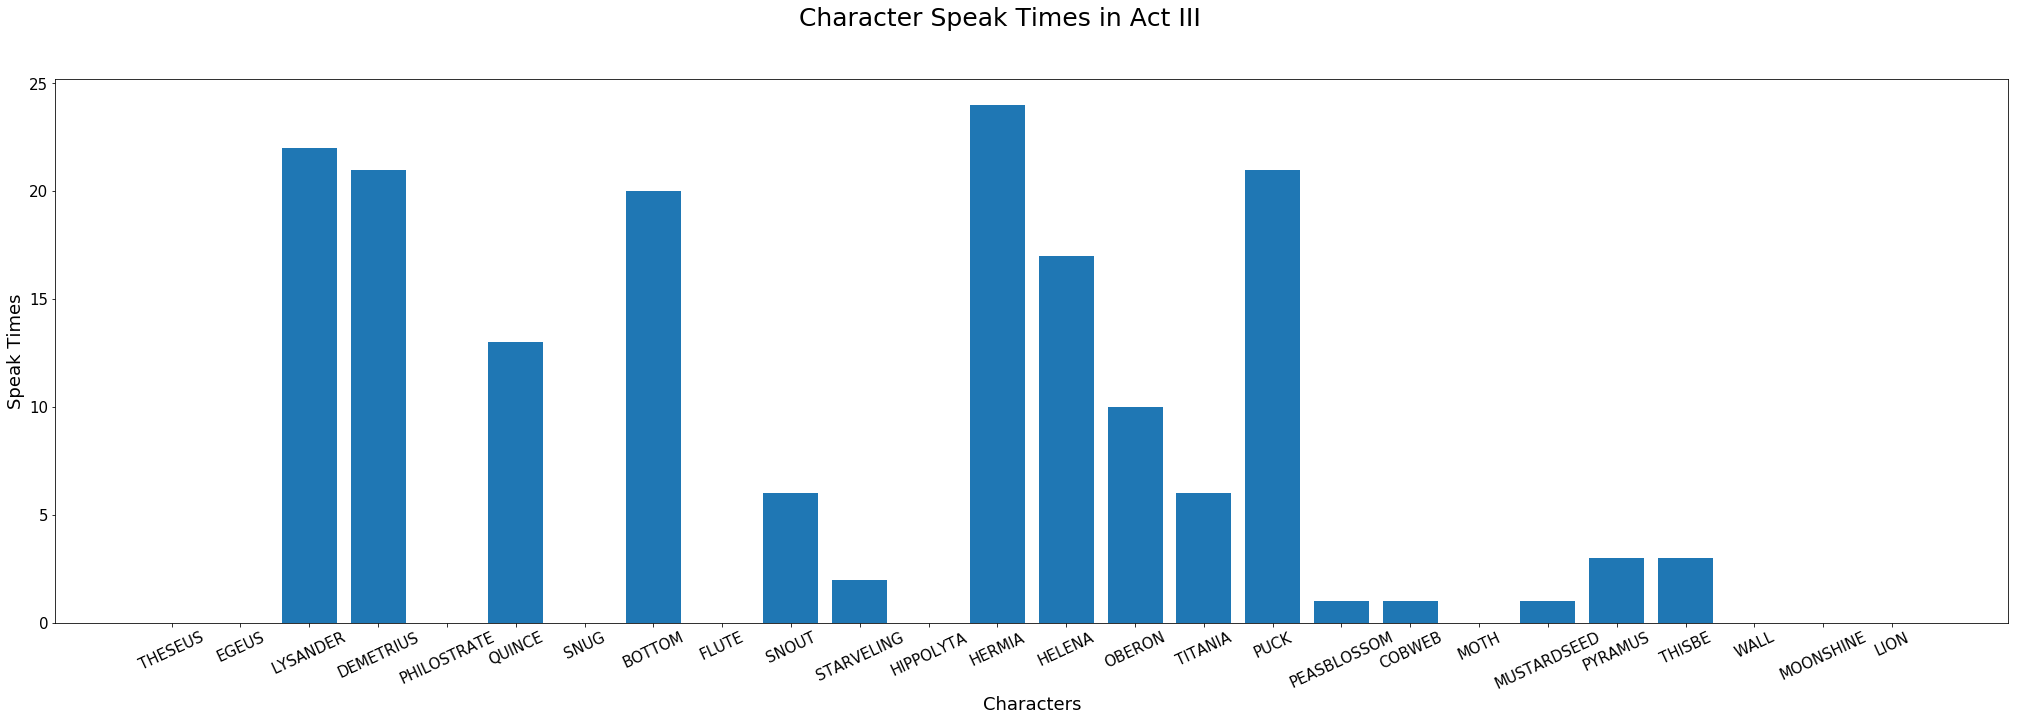

In Act IV The character(s) speak most often is(are): BOTTOM , who spoke 12 times: 



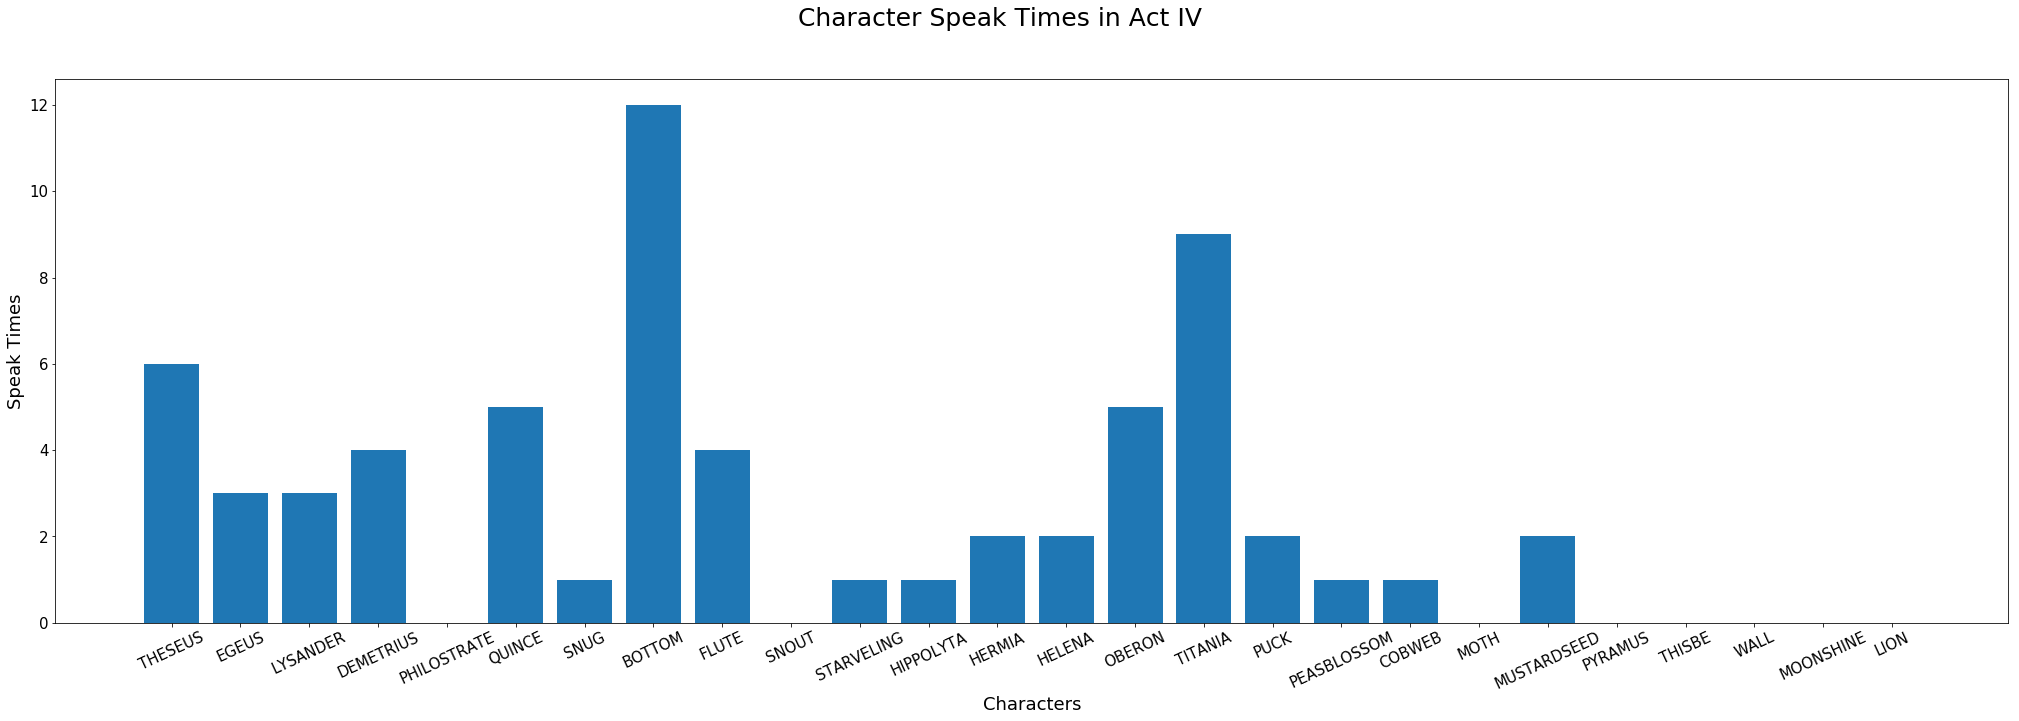

In Act V The character(s) speak most often is(are): THESEUS , who spoke 33 times: 



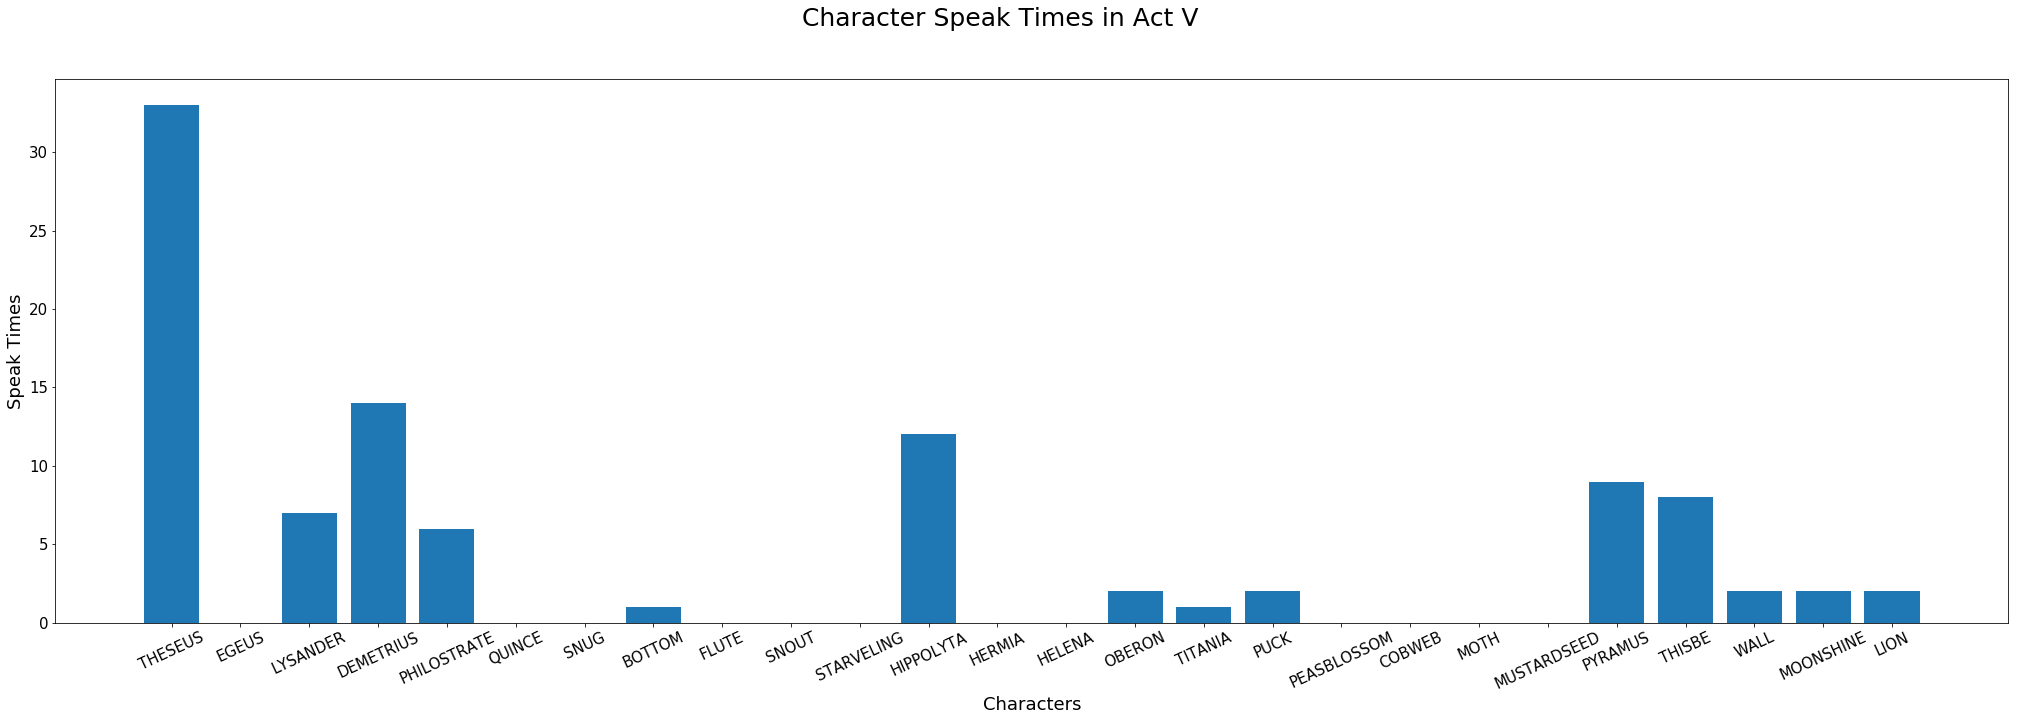

In [52]:
## 5.4. Analyze the speak time of each character in each act so that we can have a
##      overview of the leading character(s) in each act, or say which story line
##      is being talked in each act.

# Calculate the speak times of each character in each act.
speak_time_in_acts = np.zeros((len(scenes_in_acts), len(char)))
for act_i in range(len(scenes_in_acts)):
    for scene in scenes_in_acts[act_i]:
        for line in scene:
            for char_i in range(len(char)):
                if char[char_i] == line:
                    speak_time_in_acts[act_i][char_i] += 1

# Find the character(s) who spoke most in each act and plot the speak time of
# all characters.
for act_i in range(len(scenes_in_acts)):
    x_a = roman(act_i + 1)
    max_speak_time_in_acts = int(np.amax(speak_time_in_acts[act_i]))
    max_speak_time_in_acts_index = int(np.argmax(speak_time_in_acts[act_i]))
    most_speak_chars_in_acts = char[max_speak_time_in_acts_index]
    print("In Act", x_a, "The character(s) speak most often is(are):",
          most_speak_chars_in_acts, ", who spoke",
          max_speak_time_in_acts, "times:", "\n")
    f_in_acts = plt.figure(figsize = (35, 10))
    f_in_acts.suptitle("Character Speak Times in Act {}".format(x_a),
                       fontsize = 25)
    a_in_acts = f_in_acts.add_subplot(111)
    plt.xlabel("Characters", fontsize = 18)
    plt.ylabel("Speak Times", fontsize = 18)
    a_in_acts.tick_params(axis = 'both', which = 'major', labelsize = 15)
    a_in_acts.set_xticklabels(char, rotation = 25, fontsize = 15)
    a_in_acts.bar(char, speak_time_in_acts[act_i])
    plt.show()

    
# Conclusion:

# From the result below, considering the characters' descriptions which indicate their
# relationships, the main characters can be divided into four groups: Hermia Group,
# Quince Group, Oberon Group and Theseus Group and each group is leading a story line.

# In Act I, two story lines led by Hemia Group and Quince Group go simultaneously,
#           Theseus story line go at the same time.
# In Act II, the story line led by Oberon Group starts going as the main one and
#           Hemia story line keeps going at the same time.
# In Act III, the story lines led by Hemia Group becomes the main one,
#           Quince line and Oberon line continue going.
# In Act IV, the story lines led by Quince Group becomes the main one,
#            others keep going and Theseus line starts going again.
# In Act V, the story lines led by Theseus Group becomes the main one,
#           followed by Hermia line, few Quince and Oberon lines.

# Hemia line exists in all acts and is the main line in Act I & Act III,
#            which shows Hemia line is the first important line.
# Quince line is absent in Act II and is the main line in Act I & Act IV,
#             which shows Quince line is the second important line.
# Oberon line is absent in Act I and is the main line only in Act II,
#             which shows Oberon line is the third important line.
# Theseus line is absent in Act II & III and is the main line only in Act V,
#              which shows Theseus line is the fourth important line.